In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/merged_file.csv', sep=';')

# Display the DataFrame
print(df)

   Parameter  Crude protein  Gross energy (kcal)  Phosphorus consumption  \
0     As fed           58.4                 5640                    0.56   
1     As fed            0.0                    0                  351.00   
2     As fed           23.7                 4060                    0.59   
3     As fed            0.0                 9310                   10.33   
4     As fed            0.0                    0                    0.00   
..       ...            ...                  ...                     ...   
64    As fed           63.2                 5460                    1.39   
65    As fed           10.7                 2790                    0.33   
66    As fed            3.5                 3980                    0.00   
67    As fed           61.6                 5200                    6.91   
68    As fed           52.4                 4180                    0.00   

    Cumulative energy demand (non-renewable: fossil+nuclear)  \
0                      

In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df_numeric = df.select_dtypes(include=[float, int])

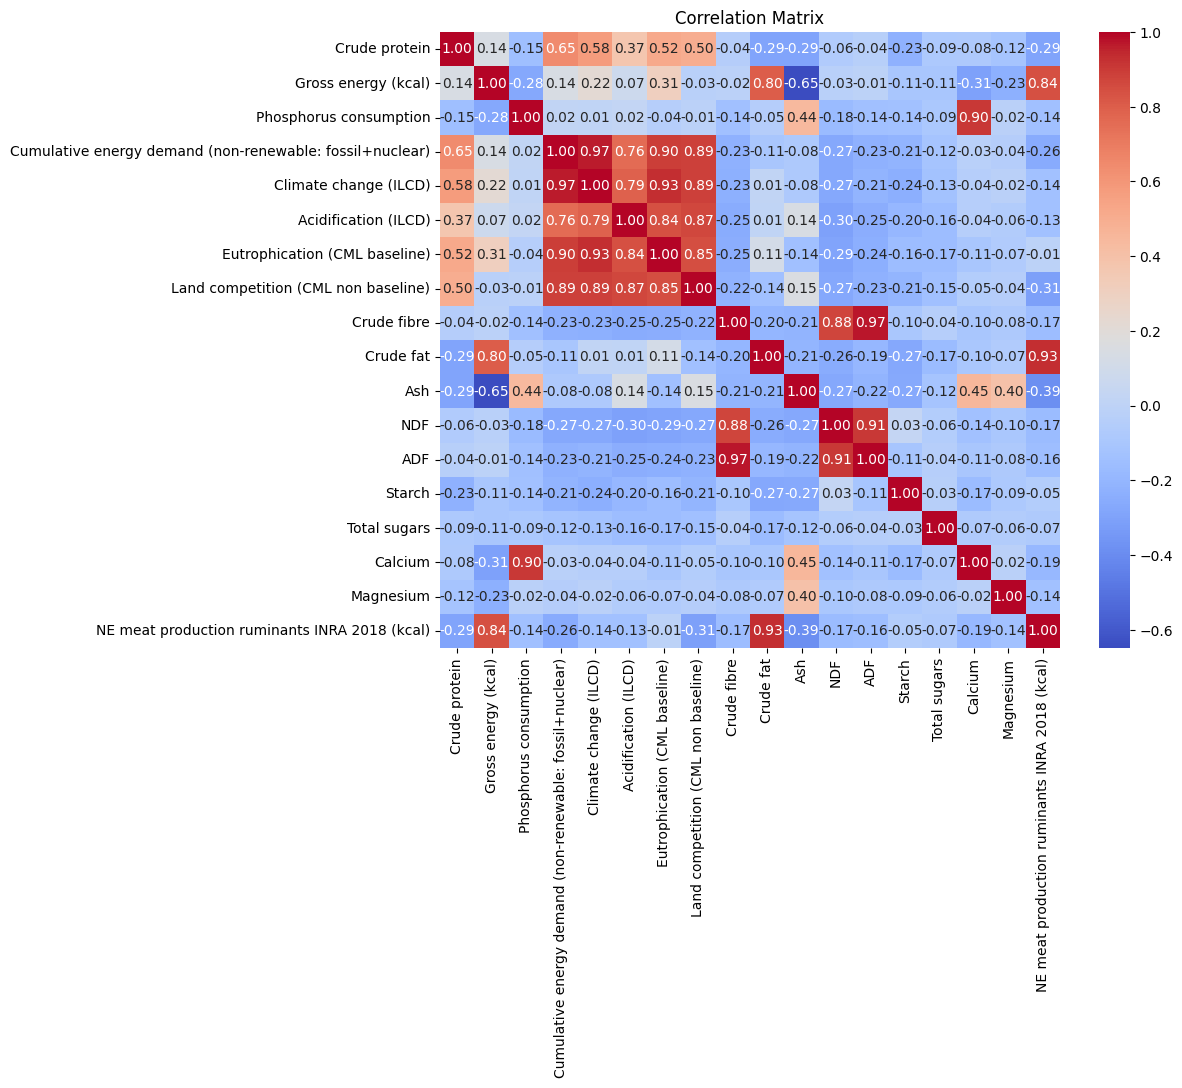

In [8]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [29]:
import numpy as np
import pandas as pd
from scipy import stats
z_scores = np.abs(stats.zscore(df_numeric))

# Threshold for identifying outliers
z_threshold = 3

# Filter out rows with outliers
df_filtered = df_numeric[(z_scores < z_threshold).all(axis=1)]


In [30]:
feature_columns = df[['Crude protein', 'Gross energy (kcal)', 'Crude fibre','Crude fat','Ash','Starch','Total sugars','Calcium','Magnesium','NE meat production ruminants INRA 2018 (kcal)']]
target_columns = df[['Phosphorus consumption', 'Cumulative energy demand (non-renewable: fossil+nuclear)','Eutrophication (CML baseline)','Climate change (ILCD)','Acidification (ILCD)','Land competition (CML non baseline)']]

In [31]:
feature_columns = df[['Crude protein', 'Gross energy (kcal)', 'Crude fibre',
                      'Crude fat', 'Ash', 'Starch', 'Total sugars',
                      'Calcium', 'Magnesium',
                      'NE meat production ruminants INRA 2018 (kcal)']]

target_columns = df[['Phosphorus consumption', 'Cumulative energy demand (non-renewable: fossil+nuclear)',
                     'Eutrophication (CML baseline)', 'Climate change (ILCD)',
                     'Acidification (ILCD)', 'Land competition (CML non baseline)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_columns, test_size=0.2)

In [32]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

In [33]:
# Initialize the MultiOutputRegressor with XGBRegressor as the estimator
multi_reg = MultiOutputRegressor(estimator=XGBRegressor())

# Fit the MultiOutputRegressor on the cleaned normalized training data
multi_reg.fit(X_train, y_train)

# Make predictions on the cleaned normalized testing data
multi_reg_pred = multi_reg.predict(X_test)

# If desired, transform the predicted values back to the original scale
# (Assuming scaler_targets is the StandardScaler used for target normalization)
# multi_reg_pred_original = scaler_targets.inverse_transform(multi_reg_pred)

multi_reg_pred

array([[2.86741805e+00, 4.30834341e+00, 2.44291477e+01, 2.53289062e+02,
        6.15234347e-03, 2.41889778e-04],
       [5.22589254e+00, 2.81988190e+02, 3.13664764e+02, 1.21156279e+04,
        9.26436037e-02, 3.69778201e-02],
       [4.73578982e-02, 2.57496977e+00, 3.13713336e+00, 6.60535889e+02,
        2.57535721e-03, 2.41889778e-04],
       [6.40209770e+00, 5.41094017e+00, 8.65664387e+00, 1.00236206e+03,
        5.45345899e-03, 4.51649306e-04],
       [5.36970472e+00, 2.81995605e+02, 3.14998718e+02, 1.21209971e+04,
        9.28290412e-02, 3.69778201e-02],
       [1.46672845e+00, 8.72719002e+00, 5.02583694e+01, 6.32248108e+02,
        1.14284391e-02, 2.41889778e-04],
       [8.28343034e-01, 3.33103395e+00, 1.00606413e+01, 1.95276352e+02,
        3.14572919e-03, 2.41889778e-04],
       [1.20511675e+01, 2.02709522e+01, 7.97111053e+01, 8.21016968e+02,
        6.63182046e-03, 4.14653507e-04],
       [9.66373980e-02, 1.67597408e+01, 1.59806404e+01, 7.73079590e+02,
        7.10081635e-03, 

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Calculate R-squared (R^2)
r2 = r2_score(y_test, multi_reg_pred)


print("R-squared (R^2):", r2)

R-squared (R^2): 0.6379060908477959
